In [13]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.decomposition import PCA
import utils
from tqdm import tqdm 
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Read data
cluster_identities = np.load('data/tasic/iden-tasic.npy')
ss_data = np.load('data/tasic/npdata-tasic.npy')

In [3]:
ss_data = np.transpose(ss_data)
combined = [(cluster_identities[i], ss_data[i]) for i in range(len(cluster_identities))]

# Sort by cluster identity
combined.sort(key=lambda x: x[0])
ss_data = np.array([x[1] for x in combined])
ss_data = np.log(ss_data + 1)

In [4]:
cluster_sizes = [0] * int(max(cluster_identities) + 1)
for i, v in enumerate(cluster_identities):
    cluster_sizes[int(v)] += 1
cluster_sizes

[43, 761, 29, 812, 38, 22, 22, 82]

In [19]:
n = ss_data.shape[0]
D = np.zeros((n, n))
for i in tqdm(range(n)):
    for j in range(n):
        D[i, j] = np.linalg.norm(ss_data[i] - ss_data[j])

100%|██████████| 1809/1809 [01:07<00:00, 26.86it/s]


In [21]:
D

array([[  0.        , 303.5182604 , 310.40650418, ..., 672.16904697,
        678.90369332, 669.45603363],
       [303.5182604 ,   0.        , 310.3554777 , ..., 700.75260795,
        707.49975707, 698.11484413],
       [310.40650418, 310.3554777 ,   0.        , ..., 664.38710264,
        670.95915159, 661.82564815],
       ...,
       [672.16904697, 700.75260795, 664.38710264, ...,   0.        ,
         54.16889998,  53.87496011],
       [678.90369332, 707.49975707, 670.95915159, ...,  54.16889998,
          0.        ,  52.91263872],
       [669.45603363, 698.11484413, 661.82564815, ...,  53.87496011,
         52.91263872,   0.        ]])

In [5]:
D_pre = utils.get_distance_matrix_seq(ss_data)

In [8]:
pca_dim=10

pca = PCA(n_components=pca_dim)
pca.fit(ss_data)

ss_data_pca = pca.transform(ss_data)

In [9]:
D_post = utils.get_distance_matrix_seq(ss_data_pca)

In [10]:
C = D_pre / D_post

/var/folders/p0/nb5t36rs6p5_2b9yzyw6y8hw0000gn/T/ipykernel_4328/2875983867.py:1: RuntimeWarning: invalid value encountered in divide
  C = D_pre / D_post


In [11]:
avg_inter_compres, avg_intra_comrpes = utils.get_average_compression(C, cluster_sizes, len(cluster_sizes))
avg_inter_compres, avg_intra_comrpes

(array([1.70392733, 2.4399846 , 1.86281119, 2.43339638, 1.75705046,
        2.0137503 , 1.69030193, 2.32283581]),
 array([ 8.24599429,  4.21060297,  7.73189911,  4.13719527,  7.82502332,
        10.51108692, 10.57670041,  2.53618376]))

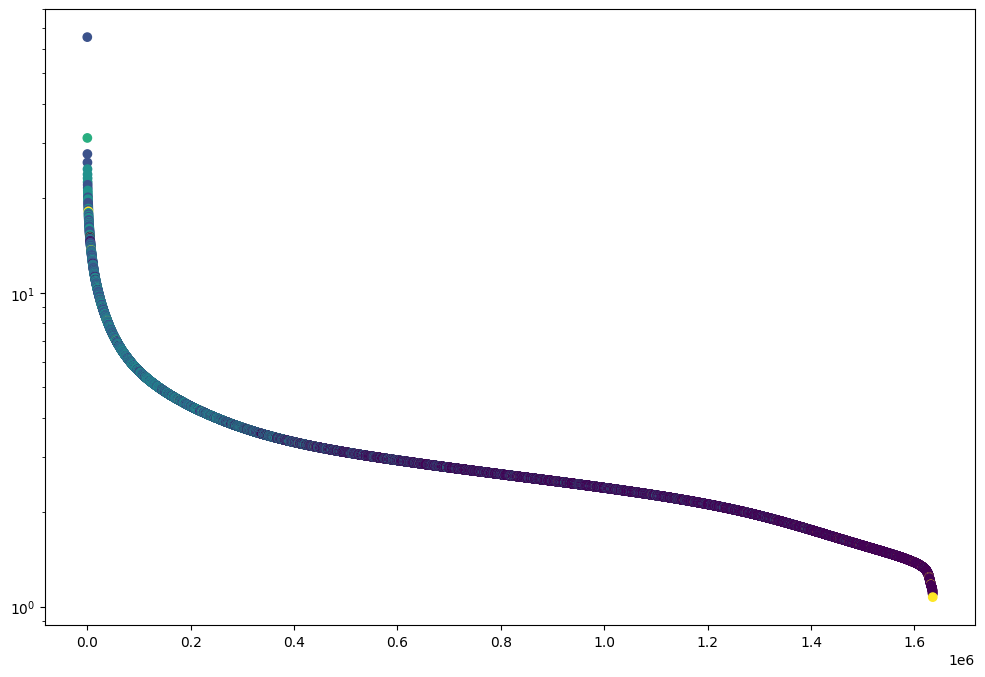

In [15]:
cgraph = utils.compression_grouping(C, cluster_sizes)[::-1]
step_size = 100
index = list(range(0, len(cgraph), step_size))

plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.scatter(index, cgraph[index, 0], c=cgraph[index, 1])
# Set vertical scale to be logarithmic
plt.yscale('log')
plt.show()

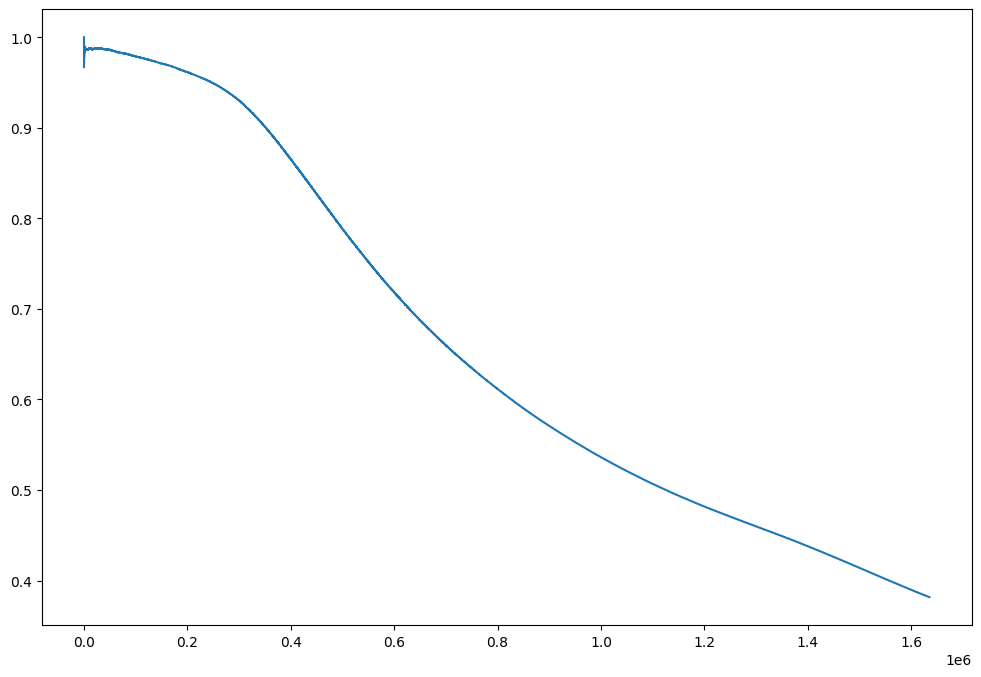

In [17]:
curr = 0
prop = []
for i in range(len(cgraph)): 
    if cgraph[i, 1] != 0: 
        curr += 1
    prop.append(curr / (i + 1))

plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.plot(range(len(prop)), prop)
plt.show()